In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Building an Image Classifier
First let's install and import TensorFlow and Keras

> conda install tensorflow

> conda install pip

> pip install --upgrade tensorflow==2.0.0-rc1

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

In [4]:
tf.__version__


'2.15.0'

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

![image.png](attachment:image.png)

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


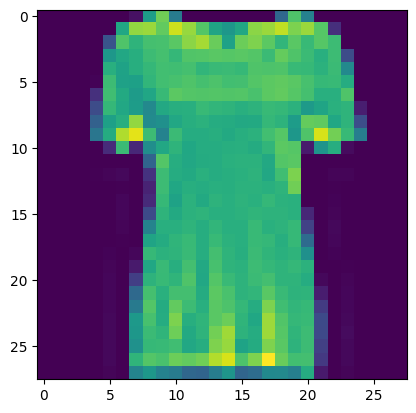

In [7]:
plt.imshow(X_train_full[10])

In [8]:
y_train_full[0]

9

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train_full[10]]

'T-shirt/top'

In [11]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

### Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [12]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [13]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [14]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Create the model architecture
There are two APIs for defining a model in Keras:
* Sequential model API
* Functional API

![](Seq_api.png "Title")

![](Functional.JPG "Title")

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

![](Structure.jpg "Title")

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


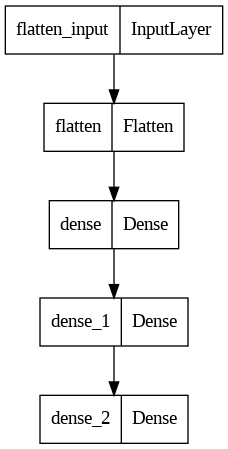

In [18]:
import pydot
keras.utils.plot_model(model)

We can access the parameters using get_weight() method

In [19]:
weights, biases = model.layers[1].get_weights()

In [20]:
weights

array([[ 0.03785118, -0.0142405 ,  0.03922373, ...,  0.05915922,
        -0.06403961,  0.06851253],
       [ 0.0728167 , -0.0034754 ,  0.06670547, ...,  0.02218714,
        -0.02099624, -0.05722925],
       [-0.02240495,  0.05773211, -0.06476601, ..., -0.03859344,
        -0.0598406 , -0.07154743],
       ...,
       [-0.05472685,  0.02181022,  0.05217841, ...,  0.02171296,
         0.00869483,  0.00349335],
       [-0.00873808,  0.06254931,  0.06400965, ...,  0.05377926,
        -0.01253304,  0.04978251],
       [ 0.05086568,  0.02419221, -0.01107676, ..., -0.05211342,
        -0.03731954, -0.02147596]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

Documentation - https://keras.io/models/sequential/

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [25]:
model_history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7181 - accuracy: 0.7672 - val_loss: 0.5217 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4878 - accuracy: 0.8284 - val_loss: 0.4368 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4425 - accuracy: 0.8439 - val_loss: 0.5335 - val_accuracy: 0.8030
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4160 - accuracy: 0.8551 - val_loss: 0.3944 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3978 - accuracy: 0.8611 - val_loss: 0.3771 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3794 - accuracy: 0.8669 - val_loss: 0.3750 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3669 - accuracy: 0.8702 - val_loss: 0.3661 - val_accuracy:

In [26]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [27]:
model_history.history

{'loss': [0.718109667301178,
  0.48782628774642944,
  0.4424574673175812,
  0.41601747274398804,
  0.39775562286376953,
  0.3793642818927765,
  0.3669488728046417,
  0.35590097308158875,
  0.3450835347175598,
  0.3358319103717804,
  0.3273788392543793,
  0.3183412551879883,
  0.31094127893447876,
  0.30483341217041016,
  0.29669395089149475,
  0.2918560802936554,
  0.2859986424446106,
  0.2799971103668213,
  0.27496787905693054,
  0.2693273425102234,
  0.2641942501068115,
  0.25947806239128113,
  0.25508832931518555,
  0.25100746750831604,
  0.24648858606815338,
  0.24215225875377655,
  0.23844391107559204,
  0.23503175377845764,
  0.23055513203144073,
  0.2272401601076126],
 'accuracy': [0.7671818137168884,
  0.8284181952476501,
  0.843890905380249,
  0.8550545573234558,
  0.8611454367637634,
  0.8669090867042542,
  0.870236337184906,
  0.8741272687911987,
  0.8787636160850525,
  0.8802909255027771,
  0.883472740650177,
  0.8870000243186951,
  0.8884727358818054,
  0.8905454277992249,

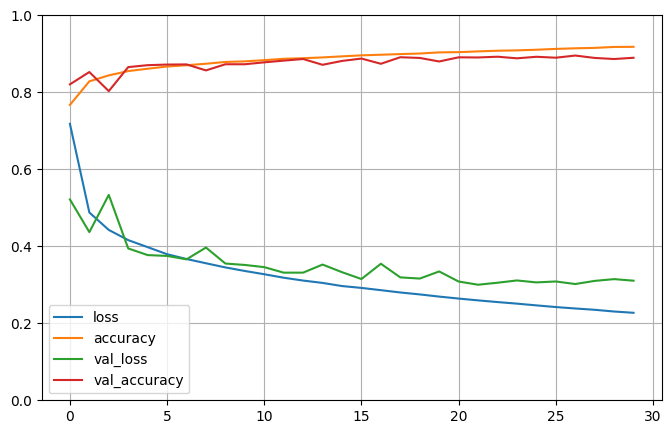

In [28]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.8817


[0.33998849987983704, 0.8816999793052673]

In [30]:
X_new = X_test[:3]

In [31]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 124ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [33]:
np.array(class_names)[y_pred]

NameError: name 'y_pred' is not defined

AxesImage(size=(28, 28))


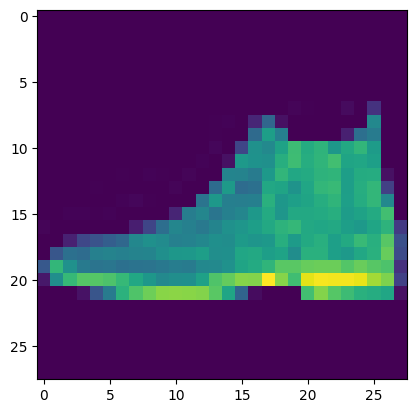

In [34]:
print(plt.imshow(X_test[0]))

AxesImage(size=(28, 28))


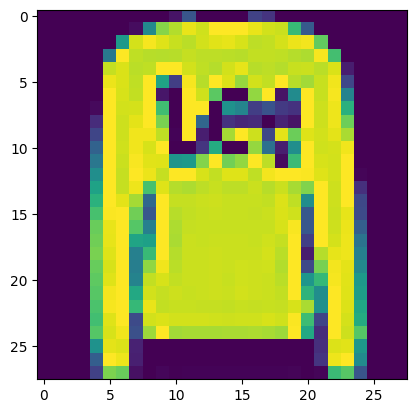

In [35]:
print(plt.imshow(X_test[1]))

AxesImage(size=(28, 28))


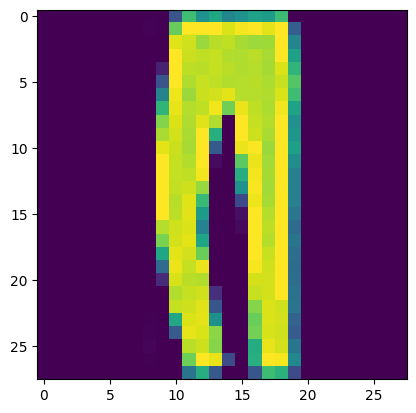

In [36]:
print(plt.imshow(X_test[2]))